In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [4]:
data_dir = "/mnt/s/MySpace/Assignment/Dataset"

In [5]:
img_size = (224, 224)
batch_size = 32

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


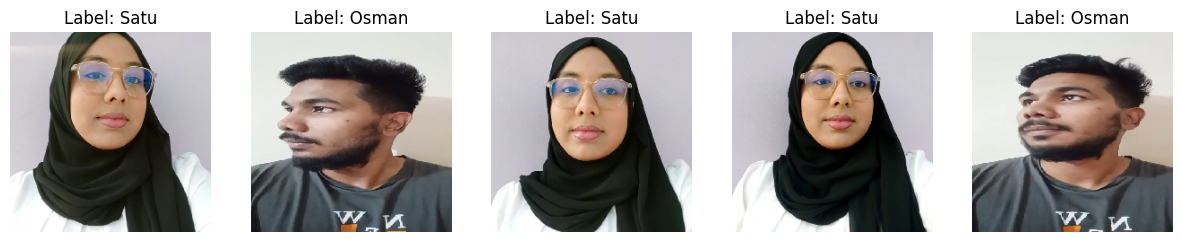

In [9]:
def display_sample_images(generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i]
        label = class_names[int(labels[i])]
        
        axes[i].imshow(img)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

# Display sample images before training
display_sample_images(train_generator)

In [10]:
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
base_model.trainable = False

# Create classification model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
250/250 [==============================] - 683s 3s/step - loss: 0.0240 - accuracy: 0.9994 - val_loss: 0.1111 - val_accuracy: 0.9960
Epoch 2/5
250/250 [==============================] - 666s 3s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 1.0000
Epoch 3/5
250/250 [==============================] - 672s 3s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 4/5
250/250 [==============================] - 779s 3s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 1.0000
Epoch 5/5
250/250 [==============================] - 774s 3s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 1.0000


1/1 [==============================] - 2s 2s/step


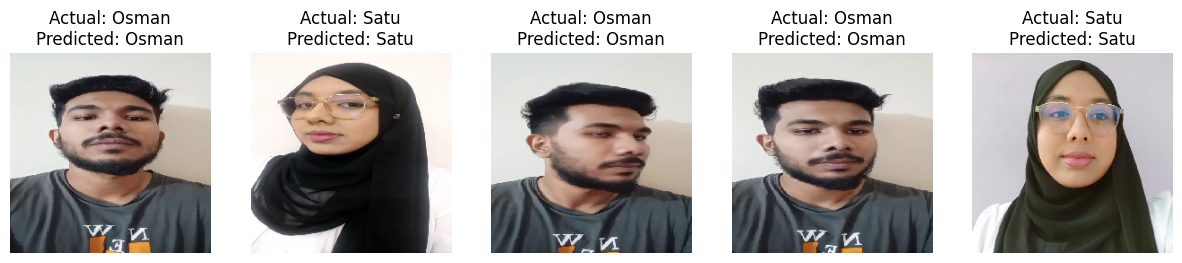

In [15]:
def visualize_predictions(model, generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    preds = model.predict(images)
    pred_labels = np.argmax(preds, axis=1)
    
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        img = images[i]
        true_label = class_names[int(labels[i])]
        predicted_label = class_names[int(pred_labels[i])]
        
        axes[i].imshow(img)
        axes[i].set_title(f"Actual: {true_label}\nPredicted: {predicted_label}")
        axes[i].axis("off")
    plt.show()

# Visualize predictions
visualize_predictions(model, val_generator)